In [94]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../../Datos-Fuentes/Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../../Datos-Fuentes/Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

### **Visualizar Info**

In [95]:
import pandas as pd
import chardet


archivo = DATOS_DIR + 'Zoo.csv'

with open(archivo, 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv(archivo, encoding=result['encoding'])
display(df)
df.info()
df.nunique()

,animal,Tiene_Pelo,Tiene_Plumas,Nace_de_huevo,Toma_Leche,Vuela,Acuatico,Depredador,Dentado,Vertebrado,Respira,Venenoso,Tiene_Aletas,Cant_Patas,Tiene_Cola,Domestico,Tamano_Gato,Clase
0,oso_hormiguero,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
1,antilope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mamifero
2,robalo,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Pez
3,oso,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
4,jabali,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mamifero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,canguro,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,Mamifero
97,avispa,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,Insecto
98,lobo,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mamifero
99,gusano,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,Invertebrado


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   animal         101 non-null    object
 1   Tiene_Pelo     101 non-null    int64 
 2   Tiene_Plumas   101 non-null    int64 
 3   Nace_de_huevo  101 non-null    int64 
 4   Toma_Leche     101 non-null    int64 
 5   Vuela          101 non-null    int64 
 6   Acuatico       101 non-null    int64 
 7   Depredador     101 non-null    int64 
 8   Dentado        101 non-null    int64 
 9   Vertebrado     101 non-null    int64 
 10  Respira        101 non-null    int64 
 11  Venenoso       101 non-null    int64 
 12  Tiene_Aletas   101 non-null    int64 
 13  Cant_Patas     101 non-null    int64 
 14  Tiene_Cola     101 non-null    int64 
 15  Domestico      101 non-null    int64 
 16  Tamano_Gato    101 non-null    int64 
 17  Clase          101 non-null    object
dtypes: int64(16), object(2)
memory

animal           100
Tiene_Pelo         2
Tiene_Plumas       2
Nace_de_huevo      2
Toma_Leche         2
Vuela              2
Acuatico           2
Depredador         2
Dentado            2
Vertebrado         2
Respira            2
Venenoso           2
Tiene_Aletas       2
Cant_Patas         6
Tiene_Cola         2
Domestico          2
Tamano_Gato        2
Clase              7
dtype: int64

### **Grafico Info**

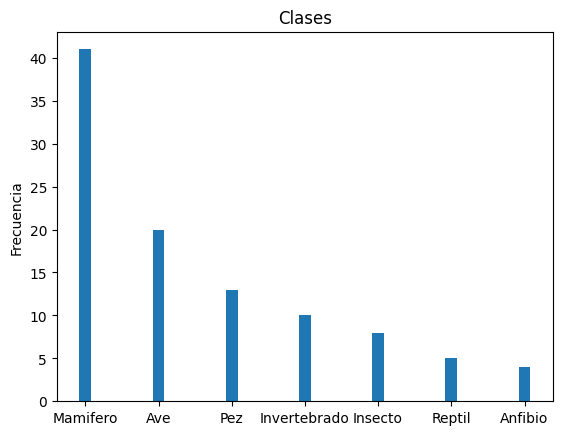

In [96]:
import matplotlib.pyplot as plt
import numpy as np

y = df['Clase'].value_counts()
x = np.arange(len(y))*5
plt.bar(x, y)
plt.title('Clases')
plt.ylabel('Frecuencia')
plt.xticks(x, y.index)

plt.show()

In [97]:
df = df.drop(columns=['animal']) #No sirve, solo molesta

### **Mapeo y Normalizo**

In [100]:
from sklearn import preprocessing, model_selection


X_m = np.array(df.iloc[0:,:-1])
T_m = np.array((df['Clase']=="Mamifero")*1)

X_a = np.array(df.iloc[0:,:-1])
T_a = np.array((df['Clase']=="Ave")*1)

X_r = np.array(df.iloc[0:,:-1])
T_r = np.array((df['Clase']=="Reptil")*1)

X_anfivio = np.array(df.iloc[0:,:-1])   #Para autoeva
T_anfivio = np.array((df['Clase']=="Anfibio")*1)

#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_m_train, X_m_test, T_m_train, T_m_test = model_selection.train_test_split(
        X_m, T_m, test_size=0.30, random_state=42)

X_a_train, X_a_test, T_a_train, T_a_test = model_selection.train_test_split(
        X_a, T_a, test_size=0.30, random_state=42)

X_r_train, X_r_test, T_r_train, T_r_test = model_selection.train_test_split(
        X_r, T_r, test_size=0.30, random_state=42)

X_anfivio_train, X_anfivio_test, T_anfivio_train, T_anfivio_test = model_selection.train_test_split(
        X_anfivio, T_anfivio, test_size=0.30, random_state=42)  #Para autoeva


normalizador = preprocessing.StandardScaler()

X_m_train = normalizador.fit_transform(X_m_train)
X_m_test = normalizador.transform(X_m_test)

X_a_train = normalizador.fit_transform(X_a_train)
X_a_test = normalizador.transform(X_a_test)

X_r_train = normalizador.fit_transform(X_r_train)
X_r_test = normalizador.transform(X_r_test)

X_anfivio_train = normalizador.fit_transform(X_anfivio_train) #Para autoeva
X_anfivio_test = normalizador.transform(X_anfivio_test)


### **Entreno perceptron**

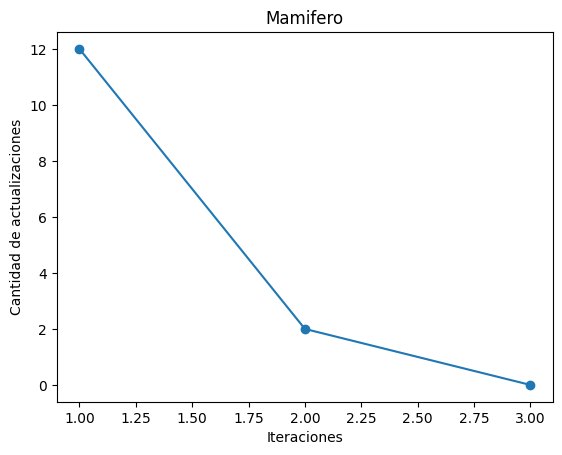

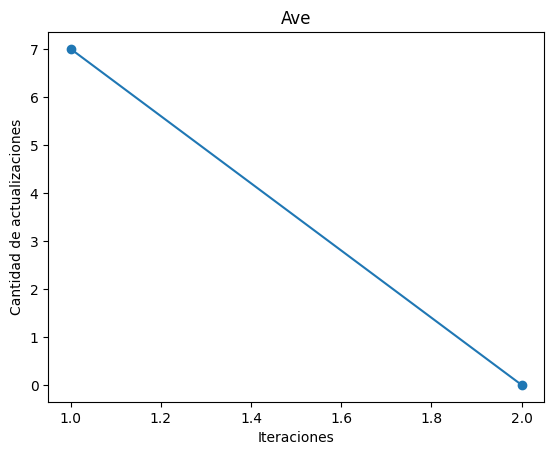

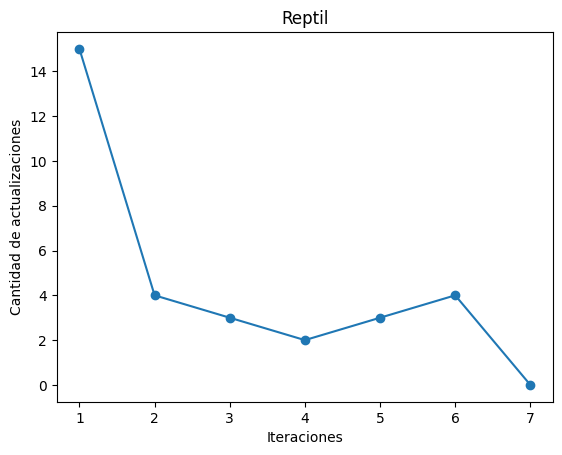

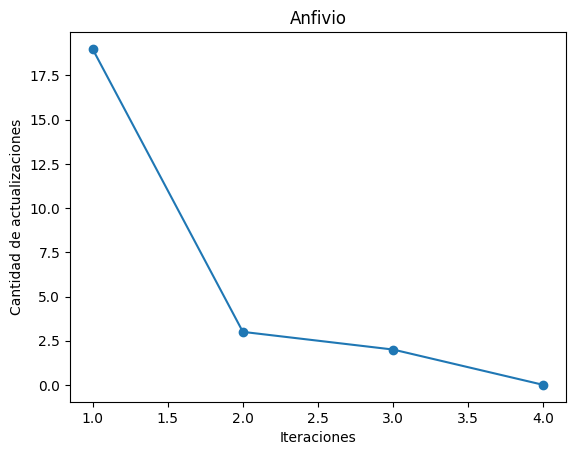

In [101]:
from ClassPerceptron import Perceptron

ppn_m = Perceptron(alpha=0.05, n_iter=200, random_state=None)
ppn_m.fit(X_m_train, T_m_train)

plt.plot(range(1, len(ppn_m.errors_) + 1), ppn_m.errors_, marker='o')
plt.title('Mamifero')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

ppn_a = Perceptron(alpha=0.05, n_iter=200, random_state=None)
ppn_a.fit(X_a_train, T_a_train)

plt.plot(range(1, len(ppn_a.errors_) + 1), ppn_a.errors_, marker='o')
plt.title('Ave')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

ppn_r = Perceptron(alpha=0.05, n_iter=200, random_state=None)
ppn_r.fit(X_r_train, T_r_train)

plt.plot(range(1, len(ppn_r.errors_) + 1), ppn_r.errors_, marker='o')
plt.title('Reptil')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

ppn_anfivio = Perceptron(alpha=0.05, n_iter=200, random_state=None) #Autoeva
ppn_anfivio.fit(X_anfivio_train, T_anfivio_train)

plt.plot(range(1, len(ppn_anfivio.errors_) + 1), ppn_anfivio.errors_, marker='o')
plt.title('Anfivio')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

### **Verifica**

In [102]:
Y_m_test = ppn_m.predict(X_m_test)
aciertos_m = sum(Y_m_test == T_m_test)
print("aciertos mamiferos = ", aciertos_m)
print("%% de aciertos mamiferos = %.2f %%" % (100*aciertos_m/X_m_test.shape[0]))

Y_a_test = ppn_a.predict(X_a_test)
aciertos_a = sum(Y_a_test == T_a_test)
print("aciertos aves = ", aciertos_a)
print("%% de aciertos aves = %.2f %%" % (100*aciertos_a/X_a_test.shape[0]))

Y_r_test = ppn_r.predict(X_r_test)
aciertos_r = sum(Y_r_test == T_r_test)
print("aciertos reptiles = ", aciertos_r)
print("%% de aciertos reptiles = %.2f %%" % (100*aciertos_r/X_r_test.shape[0]))

Y_anfivio_test = ppn_anfivio.predict(X_anfivio_test)
aciertos_anfivio = sum(Y_anfivio_test == T_anfivio_test)
print("aciertos anfivio = ", aciertos_anfivio)
print("%% de aciertos anfivio = %.2f %%" % (100*aciertos_anfivio/X_anfivio_test.shape[0]))

aciertos mamiferos =  31
% de aciertos mamiferos = 100.00 %
aciertos aves =  31
% de aciertos aves = 100.00 %
aciertos reptiles =  29
% de aciertos reptiles = 93.55 %
aciertos anfivio =  30
% de aciertos anfivio = 96.77 %
